In [22]:
import numpy as np
import pandas as pd
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt

In [43]:
def Search4Max(df,vecref):
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] == np.max(vecref):
            maxin = i
    return maxin

def lenght_between(dlambda, dpixels, pixels):
    return (dlambda/dpixels)*pixels

def build_line(x, y):
    factor = (y[1] - y[0])/(x[1] - x[0])
    weight = y[1] - factor*x[1]
    return factor, weight

def transform(x, y, px):
    m, b = build_line(x, y)
    return m*px + b

In [24]:
path = "C:/Users/Darck/Modern_Phy_Lab/4 Efecto Zeeman/data/CSV/"

# Información relativa al Cadmio:
Cadmium_parallel = pd.read_csv(path + "Cd_conB_paral_10s.csv")
Cadmium_perpend = pd.read_csv(path + "Cd_conB_perp_10s.csv")
Neon_Cadmium = pd.read_csv(path + "Calib_NeCd_10s.csv")

axis = Cadmium_perpend["Distance_(pixels)"].to_numpy()

Text(0.5, 1.0, 'Espectro del Cadmio con $\\vec{B} \\perp$')

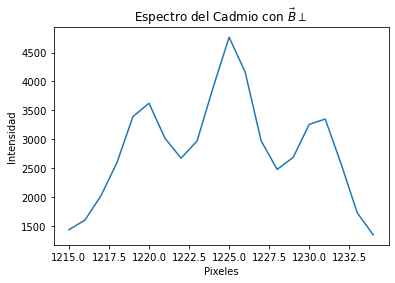

In [82]:
init, final = 1215, 1235
Cd_perpend = Cadmium_perpend["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Cd_perpend)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \perp$")

In [83]:
px_sigma1, px_pi, px_sigma2 = 1220, 1225, 1231

In [125]:
Cd_line = 643.847e-9 # metros
Ne_line = 640.2248e-9 # metros
NeCd = Neon_Cadmium["Gray_Value"].to_numpy()

Text(0.5, 1.0, 'Espectros de Neón y Cadmio')

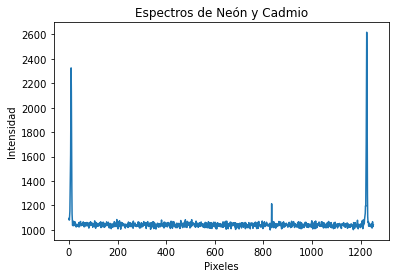

In [126]:
plt.plot(axis, NeCd)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Neón y Cadmio")

In [127]:
max_Cd = Search4Max(Neon_Cadmium,NeCd[600:])
max_Ne = Search4Max(Neon_Cadmium,NeCd[0:600])
x, y = [max_Ne, max_Cd], [Ne_line, Cd_line]

2.9787828947368546e-12

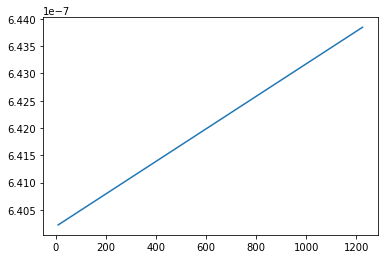

In [128]:
plt.plot(x, y)
factor, weight = build_line(x, y)
factor

In [129]:
pi = transform(x, y, px_pi)
sigma1 = transform(x, y, px_sigma1)
sigma2 = transform(x, y, px_sigma2)
sigma1, pi, sigma2

(6.438321060855264e-07, 6.43847e-07, 6.438648726973685e-07)

In [130]:
h = constants.h
c = constants.c
mub = (constants.e*constants.hbar)/(2*constants.electron_mass)

E_1 = (h*c)/Cd_line
E_1

3.0852762490916764e-19

In [131]:
distance = factor*5.5 # Esta cosa está en Angstroms si le quitas el e-10.
distance

1.63833059210527e-11

In [135]:
B = distance/Cd_line**2 * (h*c)/mub
B

0.8465358537967054